### Load required package

In [1]:
import   pandas      as    pd
import   numpy       as    np
import   os

In [2]:
import matplotlib.pyplot         as      plt
import seaborn                   as      sns

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero & Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero & Missing Values'] = 100 * mz_table['Total Zero & Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [5]:
def calculate_vif_(X, thresh = 100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [6]:
folder        =  'D:/Great Learning/BABI-Aug-C-Capstone'
os.chdir(folder)

In [7]:
inp_data =   folder + "/data/"
files    =   os.listdir(inp_data)
print(files)

['E1.xlsx', 'E2.xlsx']


In [8]:
print(inp_data)

D:/Great Learning/BABI-Aug-C-Capstone/data/


In [9]:
file1    =    inp_data + files[0]
file2    =    inp_data + files[1]
df1      =    pd.read_excel(file1, sheet_name = "E1")
df2      =    pd.read_excel(file2, sheet_name = "E2")

In [10]:
print("\nDimension of df1 {} ". format(df1.shape))
print("\nDimension of df2 {} ". format(df2.shape))


Dimension of df1 (978070, 22) 

Dimension of df2 (214387, 22) 


In [11]:
df   =  pd.DataFrame(); df = df.append(df1); df = df.append(df2);print("\nDimension of df {} ". format(df.shape))


Dimension of df (1192457, 22) 


### Data Cleaning

In [12]:
missing_zero_values_table(df)

Your selected dataframe has 22 columns and 1192457 Rows.
There are 2 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero & Missing Values,% Total Zero & Missing Values,Data Type
On time in Decimal,20659,627935,52.7,648594,54.4,float64
Date,0,1,0.0,1,0.0,datetime64[ns]


In [13]:
df.columns

Index(['Unnamed: 0', 'Date', 'Zone', 'Ward', 'SC_No', 'Phone_NO', 'UID',
       'Location', 'Service_Type', 'Mode', 'On_Time', 'On time in Decimal',
       'Power%', 'Burn_Load', 'Corrected_Watts', 'Correction_Factor',
       'Baseline(kWh)', 'Adjusted_Baseline(kWh)', 'Actual_Consumption(kWh)',
       'Energy_Saved(kWh)', 'Energy_Saving%', 'Status'],
      dtype='object')

In [14]:
df.head().T

,0,1,2,3,4
Unnamed: 0,1,2,3,4,5
Date,2017-03-01 00:00:00,2017-03-02 00:00:00,2017-03-03 00:00:00,2017-03-04 00:00:00,2017-03-05 00:00:00
Zone,3,3,3,3,3
Ward,27,27,27,27,27
SC_No,002-021-395,002-021-395,002-021-395,002-021-395,002-021-395
Phone_NO,7373708635,7373708635,7373708635,7373708635,7373708635
UID,SV05TVC10009,SV05TVC10009,SV05TVC10009,SV05TVC10009,SV05TVC10009
Location,295-NAGAR KOVIL ROAD,295-NAGAR KOVIL ROAD,295-NAGAR KOVIL ROAD,295-NAGAR KOVIL ROAD,295-NAGAR KOVIL ROAD
Service_Type,VC,VC,VC,VC,VC
Mode,Save,Save,Save,Save,Save


### Observation

There are 22 columns in the dataset and 1192457 observations.

We shall drop the following columns as it does not add any value to our analysis
1) Unnamed: 0 ==> Serial number
2) On time in Decimal ==> OVer 54% of the values are missing or zero
3) Phone_NO ==> ID variable that identifies the entity

We shall remove the one row with null value in Date column

In [15]:
required_cols =  ['Date', 'Zone', 'Ward', 'SC_No', 'UID', 'Location', 'Service_Type',\
                  'Mode', 'On_Time', 'Power%', 'Burn_Load', 'Corrected_Watts', 'Correction_Factor',\
                  'Baseline(kWh)', 'Adjusted_Baseline(kWh)', 'Actual_Consumption(kWh)','Energy_Saved(kWh)',\
                  'Energy_Saving%', 'Status']

In [16]:
data            =    df.loc[:, required_cols]

In [17]:
data            =    data.dropna()

In [18]:
print("\nDimension of our cleaned data: data {} ". format(data.shape))


Dimension of our cleaned data: data (1192456, 19) 


### Get the data type of each column

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192456 entries, 0 to 214386
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   Date                     1192456 non-null  datetime64[ns]
 1   Zone                     1192456 non-null  int64         
 2   Ward                     1192456 non-null  int64         
 3   SC_No                    1192456 non-null  object        
 4   UID                      1192456 non-null  object        
 5   Location                 1192456 non-null  object        
 6   Service_Type             1192456 non-null  object        
 7   Mode                     1192456 non-null  object        
 8   On_Time                  1192456 non-null  object        
 9   Power%                   1192456 non-null  float64       
 10  Burn_Load                1192456 non-null  int64         
 11  Corrected_Watts          1192456 non-null  int64         
 12  C

In [20]:
#Converting the variable types to categorical

cat_cols     =   ['Zone', 'Ward', 'Mode', 'On_Time', 'Status', 'Service_Type', 'SC_No', 'UID', 'Location']

for ii in range(len(cat_cols)):
    col       = cat_cols[ii]
    data[col] = data[col].astype('category')
    print("\nVariable {}".format(col))
    print(data[col].value_counts(normalize = True))
    print("\n")


Variable Zone
3    0.329445
2    0.290685
1    0.199751
4    0.180119
Name: Zone, dtype: float64



Variable Ward
27    0.080333
17    0.077017
26    0.075486
20    0.044630
48    0.042398
28    0.036641
50    0.032220
1     0.031615
19    0.030618
18    0.028064
4     0.027844
29    0.025032
16    0.023882
5     0.021025
3     0.020201
34    0.018239
8     0.018076
25    0.017320
21    0.017179
41    0.016452
9     0.014408
55    0.013907
12    0.013703
2     0.013647
30    0.013643
47    0.012364
14    0.012337
44    0.012314
24    0.011862
33    0.011496
10    0.011173
38    0.011096
11    0.009877
13    0.009871
49    0.009835
52    0.009717
22    0.009221
45    0.008761
23    0.008607
7     0.008176
42    0.007900
43    0.007485
39    0.007421
15    0.007116
31    0.007020
40    0.006557
51    0.006479
54    0.006362
6     0.005897
37    0.005695
32    0.005414
36    0.004898
53    0.004604
35    0.003832
46    0.003034
Name: Ward, dtype: float64



Variable Mode
Save    0.555445

In [21]:
data.columns

Index(['Date', 'Zone', 'Ward', 'SC_No', 'UID', 'Location', 'Service_Type',
       'Mode', 'On_Time', 'Power%', 'Burn_Load', 'Corrected_Watts',
       'Correction_Factor', 'Baseline(kWh)', 'Adjusted_Baseline(kWh)',
       'Actual_Consumption(kWh)', 'Energy_Saved(kWh)', 'Energy_Saving%',
       'Status'],
      dtype='object')

### Multi-collinearity using Variable Inflation Factor Method

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features.

VIF is defined as VIFi = 1/1-R2i where R2i is the coefficient of determination of a regression model where the ith factor is treated as a response variable in the model with all of the other factors.  VIFi can range from one to infinity.  Values equal to one imply orthogonality, while values greater than one indicate a degree of collinearity between the ith factor and one or more other factors. 
Ref: https://testscience.org/design-execute/assessing-test-adequacy/variance-inflation-factor/#:~:text=VIFi%20can%20range%20from,one%20or%20more%20other%20factors.


We get the numerical columns for calculating VIF

In [22]:
X     =   data._get_numeric_data() #drop non-numeric cols

In [23]:
Xcols =  X.columns

In [24]:
Xcols

Index(['Power%', 'Burn_Load', 'Corrected_Watts', 'Correction_Factor',
       'Baseline(kWh)', 'Adjusted_Baseline(kWh)', 'Actual_Consumption(kWh)',
       'Energy_Saved(kWh)', 'Energy_Saving%'],
      dtype='object')

In [25]:
Xcols =  Xcols.drop('Energy_Saving%')

In [26]:
X = data.loc[:, Xcols]

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192456 entries, 0 to 214386
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Power%                   1192456 non-null  float64
 1   Burn_Load                1192456 non-null  int64  
 2   Corrected_Watts          1192456 non-null  int64  
 3   Correction_Factor        1192456 non-null  float64
 4   Baseline(kWh)            1192456 non-null  float64
 5   Adjusted_Baseline(kWh)   1192456 non-null  float64
 6   Actual_Consumption(kWh)  1192456 non-null  float64
 7   Energy_Saved(kWh)        1192456 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 81.9 MB


In [28]:
# VIF dataframe
vif_data            = pd.DataFrame()
vif_data["feature"] = X.columns

In [29]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                   feature       VIF
0                   Power%  1.953003
1                Burn_Load  1.893853
2          Corrected_Watts  7.983436
3        Correction_Factor  2.975081
4            Baseline(kWh)  8.092696
5   Adjusted_Baseline(kWh)       inf
6  Actual_Consumption(kWh)       inf
7        Energy_Saved(kWh)       inf


### Observation

We have used 8 numerical variables, 'Power%', 'Burn_Load', 'Corrected_Watts', 'Correction_Factor','Baseline(kWh)', 'Adjusted_Baseline(kWh)', 'Actual_Consumption(kWh)','Energy_Saved(kWh)' and checked for multi-collinearity.

We have removed the following 5 independent variables that are highly correlated with each other as the VIF > 5. For three variables, 'Adjusted_Baseline(kWh)', 'Actual_Consumption(kWh)','Energy_Saved(kWh)' the VIF is infinity indicating a perfect correlation.

The following 6 variables that have VIF value less than 5 are retained and they are: ['Power%', 'Burn_Load', 'Corrected_Watts', 'Correction_Factor', 'Actual_Consumption(kWh)', 'Energy_Saved(kWh)']


In [30]:
calculate_vif_(X, thresh = 5)

D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'Adjusted_Baseline(kWh)' at index: 5
dropping 'Baseline(kWh)' at index: 4
Remaining variables:
Index(['Power%', 'Burn_Load', 'Corrected_Watts', 'Correction_Factor',
       'Actual_Consumption(kWh)', 'Energy_Saved(kWh)'],
      dtype='object')


,Power%,Burn_Load,Corrected_Watts,Correction_Factor,Actual_Consumption(kWh),Energy_Saved(kWh)
0,95.84,2266,1990,1.14,18.71,17.66
1,95.85,2249,1990,1.13,18.50,17.56
2,95.82,2256,1990,1.13,18.62,17.43
3,95.81,2271,1990,1.14,18.50,17.86
4,94.47,2310,1990,1.16,18.47,18.01
...,...,...,...,...,...,...
214382,93.77,1519,2400,0.63,14.71,42.79
214383,93.77,2032,2400,0.85,20.37,74.26
214384,93.77,1845,2450,0.75,22.12,2.00
214385,93.75,2627,3200,0.82,27.59,104.97


### For further analysis - Feature engineering

In [31]:
Required_columns = ['Zone', 'Ward', 'SC_No', 'UID', 'Location', 'Service_Type','On_Time','Mode', 'Power%', 'Burn_Load', 'Corrected_Watts',
       'Correction_Factor', 'Actual_Consumption(kWh)', 'Energy_Saved(kWh)','Status']

### Perform numeric encoding

Machine learning models require all input and output variables to be numeric. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.

Ref: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

In [32]:
data['Status']         = data['Status'].cat.rename_categories({'COM' : 1, 'OK' : 2, 'NC' : 3, 'HNB' : 4, 'FAIL' : 5})

In [33]:
data['Mode']           = data['Mode'].cat.rename_categories({'Save' : 1, 'CAL' : 2, 'CMS' : 3, 'Err' : 4})

In [34]:
data['Service_Type']   = data['Service_Type'].cat.rename_categories({'VC' : 1, 'SC' : 2})

In [35]:
my_dict                =    {}
sc_levels              =  data['SC_No'].value_counts().index
for   j in range(len(sc_levels)):
      key      =    sc_levels[j]
      valu     =    j + 1
      dict1    =    { key : valu}
      my_dict.update(dict1)
#
data['SC_No']          =  data['SC_No'].cat.rename_categories(my_dict)

In [36]:
my_dict                =    {}
sc_levels              =  data['UID'].value_counts().index
for   j in range(len(sc_levels)):
      key      =    sc_levels[j]
      valu     =    j + 1
      dict1    =    { key : valu}
      my_dict.update(dict1)
#
data['UID']          =  data['UID'].cat.rename_categories(my_dict)

In [37]:
my_dict                =    {}
sc_levels              =  data['Location'].value_counts().index
for   j in range(len(sc_levels)):
      key      =    sc_levels[j]
      valu     =    j + 1
      dict1    =    { key : valu}
      my_dict.update(dict1)
data['Location']          =  data['Location'].cat.rename_categories(my_dict)    

In [38]:
my_dict                =    {}
sc_levels              =  data['On_Time'].value_counts().index
for   j in range(len(sc_levels)):
      key      =    sc_levels[j]
      valu     =    j + 1
      dict1    =    { key : valu}
      my_dict.update(dict1)
data['On_Time']          =  data['On_Time'].cat.rename_categories(my_dict)

#### Feature selection

Many factors affect the performance of a model in machine learning. They include:

1) Algorithm choice 

2) The features used to train the model

3) Parameters used in the algorithm

4) Quality of the dataset

Occasionally in a dataset, the set of features in their raw form do not provide the optimal information to train and to perform the prediction. Therefore, it is beneficial to discard the conflicting and unnecessary features from our dataset by the process known as feature selection methods or feature selection techniques.


Sci-Kit offers SelectFromModel as a tool to run embedded models for feature selection. The module makes use of a threshold parameter, which can be either user specified or heuristically set based on median or mean.  Below, the code uses Lasso (L1 penalty) to find features for inclusion.  I set the threshold to 0.10, which results in six features being selected.  The get the names of the selected variables, a mask (integer index) of the features selected must be used by calling get_support().

Ref: https://www.datasklr.com/ols-least-squares-regression/variable-selection

In [39]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# load data

X   =   data.loc[:, Required_columns]
y   =   data.loc[:, 'Energy_Saving%']

# Use L1 penalty
estimator = LassoCV(cv=5, normalize = True)

###
### For various thresholds from 0.10, 0.15, 0.20, 0.25, 0.30, 0.50 get the important features
###

threshold_range =  [0.10, 0.15, 0.20, 0.25, 0.30, 0.50]
threshold_df    =  pd.DataFrame()

for  k in range(len(threshold_range)):
    threshold_val  =  threshold_range[k]
    # Set a minimum threshold of 0.10
    sfm = SelectFromModel(estimator, threshold  = threshold_val, prefit=False, norm_order=1, max_features=None)

    sfm.fit(X, y)

    feature_idx = sfm.get_support()
    feature_name = X.columns[feature_idx]
    fls          = list(feature_name)
    t_df         =  pd.DataFrame({'Threshold' : threshold_val, 'Var_list' : fls})
    threshold_df =  threshold_df.append(t_df)

###
print(threshold_df)

   Threshold                 Var_list
0       0.10                     Zone
1       0.10                   Power%
2       0.10        Correction_Factor
3       0.10  Actual_Consumption(kWh)
4       0.10        Energy_Saved(kWh)
5       0.10                   Status
0       0.15                     Zone
1       0.15                   Power%
2       0.15        Correction_Factor
3       0.15  Actual_Consumption(kWh)
4       0.15        Energy_Saved(kWh)
5       0.15                   Status
0       0.20                     Zone
1       0.20                   Power%
2       0.20        Correction_Factor
3       0.20  Actual_Consumption(kWh)
4       0.20        Energy_Saved(kWh)
5       0.20                   Status
0       0.25                     Zone
1       0.25                   Power%
2       0.25        Correction_Factor
3       0.25  Actual_Consumption(kWh)
4       0.25        Energy_Saved(kWh)
5       0.25                   Status
0       0.30                     Zone
1       0.30

The following variables are most important in predicting the target variable: 
Zone, Power%, Correction_Factor, Actual_Consumption(kWh), Energy_Saved(kWh) and Status

In [40]:
df_method1 =    data.loc[:, ['Zone', 'Power%', 'Correction_Factor', 'Actual_Consumption(kWh)',\
                             'Energy_Saved(kWh)', 'Status']]

### Exploratory Data Analysis

In [41]:
num_var      =   df_method1.select_dtypes(include = np.number).columns.tolist() 
print(num_var)

['Power%', 'Correction_Factor', 'Actual_Consumption(kWh)', 'Energy_Saved(kWh)']


In [42]:
target_var   =  'Energy_Saving%'

In [43]:
cat_var      =   df_method1.select_dtypes(exclude = np.number).columns.tolist() 

In [44]:
print(cat_var)

['Zone', 'Status']


In [45]:
### Get original values for the encoded variables
df                    =    df_method1.copy()
df['Status']          =    df['Status'].cat.rename_categories({ 1: 'COM', 2: 'OK', 3: 'NC', 4: 'HNB', 5: 'FAIL'})

In [46]:
df['target_cat'] = pd.qcut(data['Energy_Saving%'], q = 4, precision = 0)

In [47]:
sns.set( rc = {'figure.figsize' : ( 40, 40 ), 
               'axes.labelsize' : 12 })

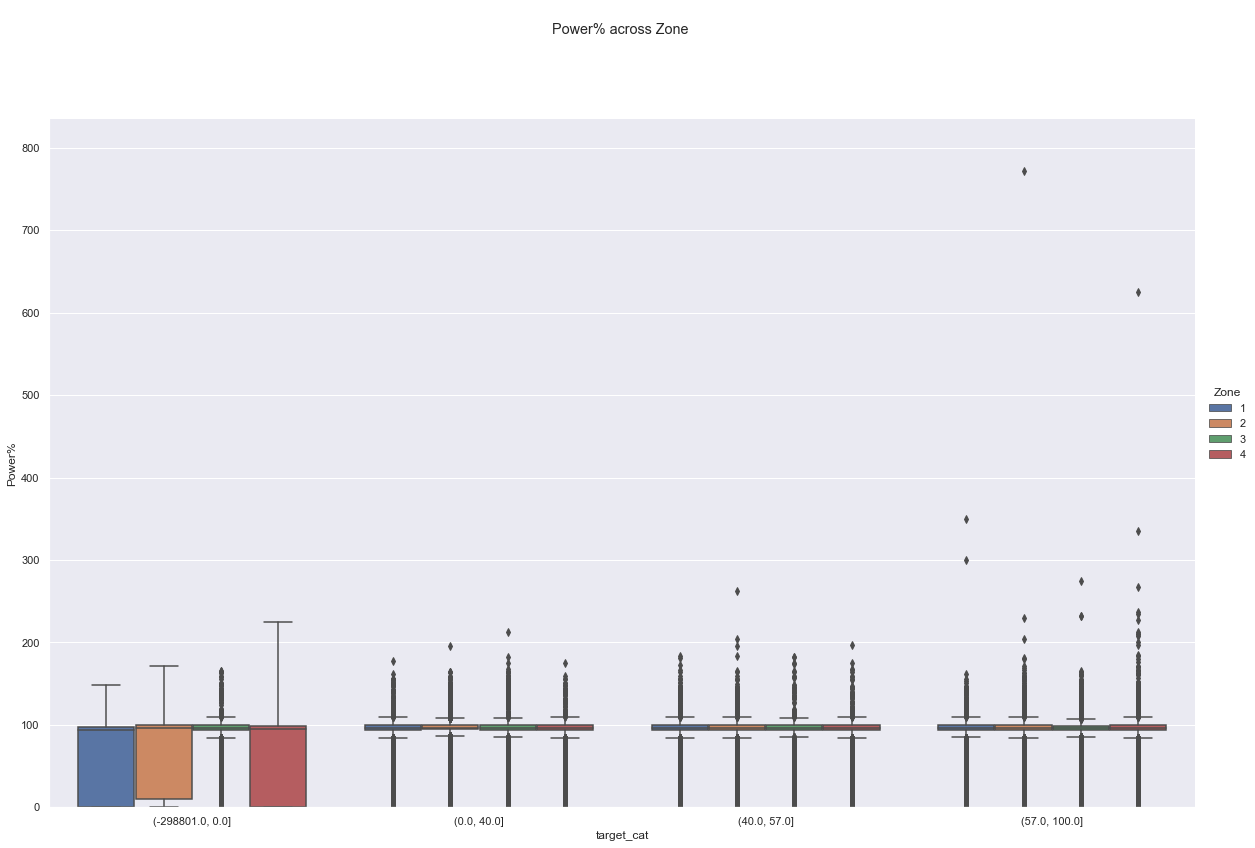

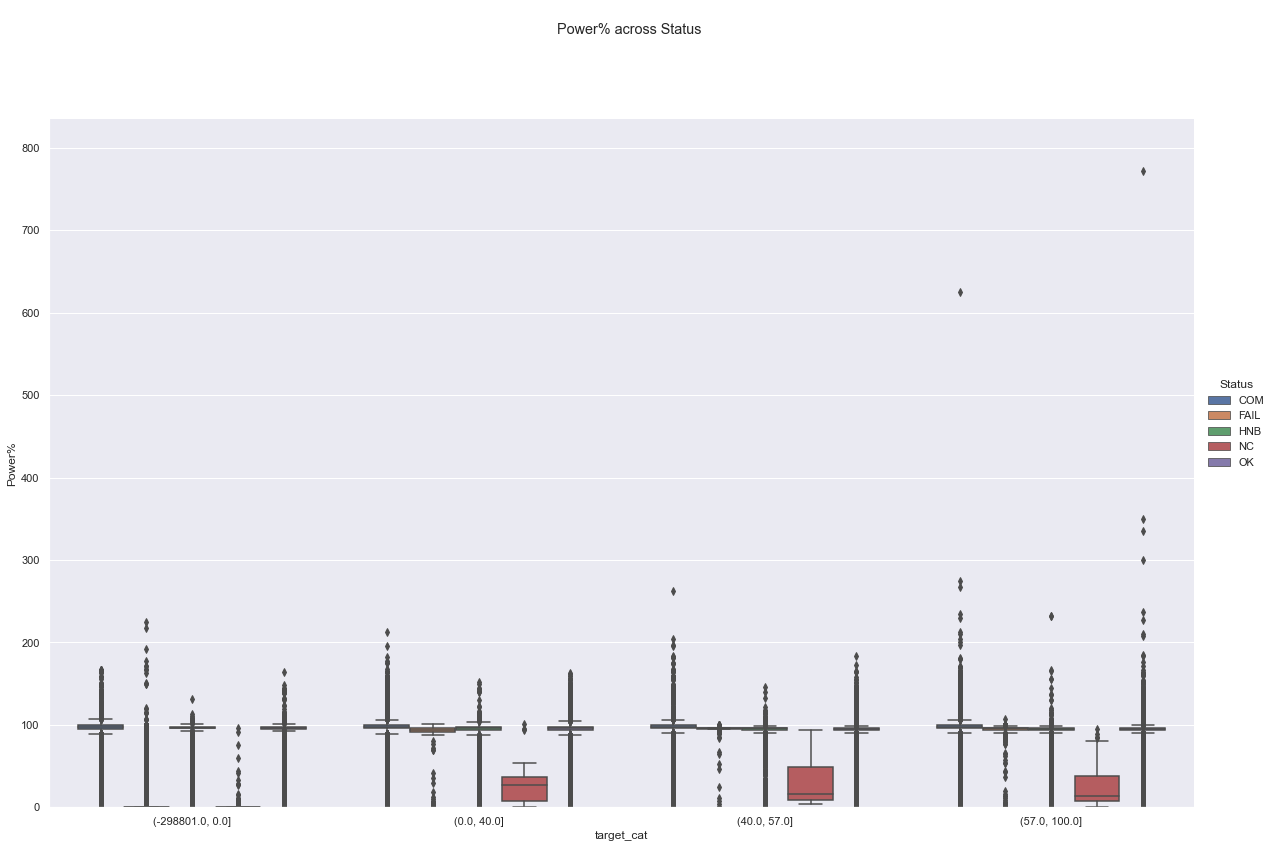

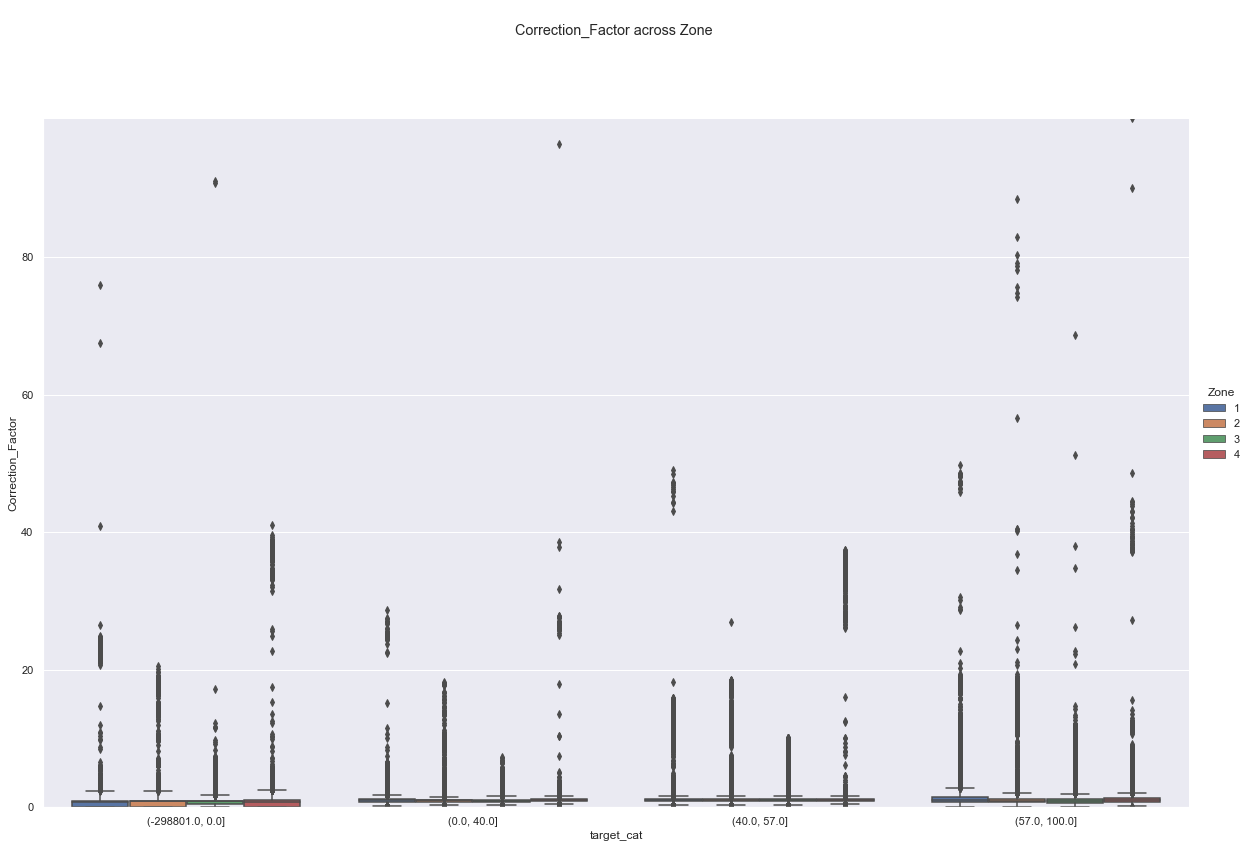

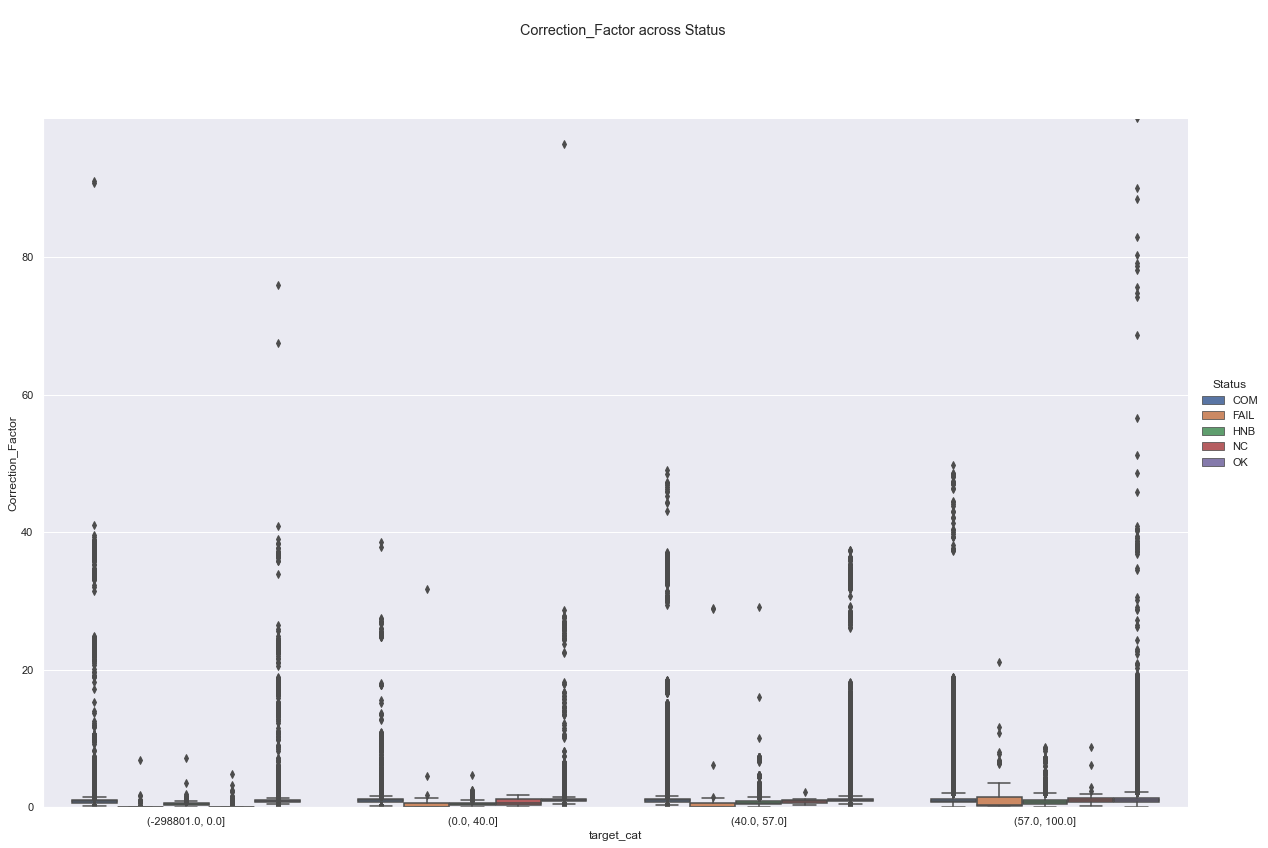

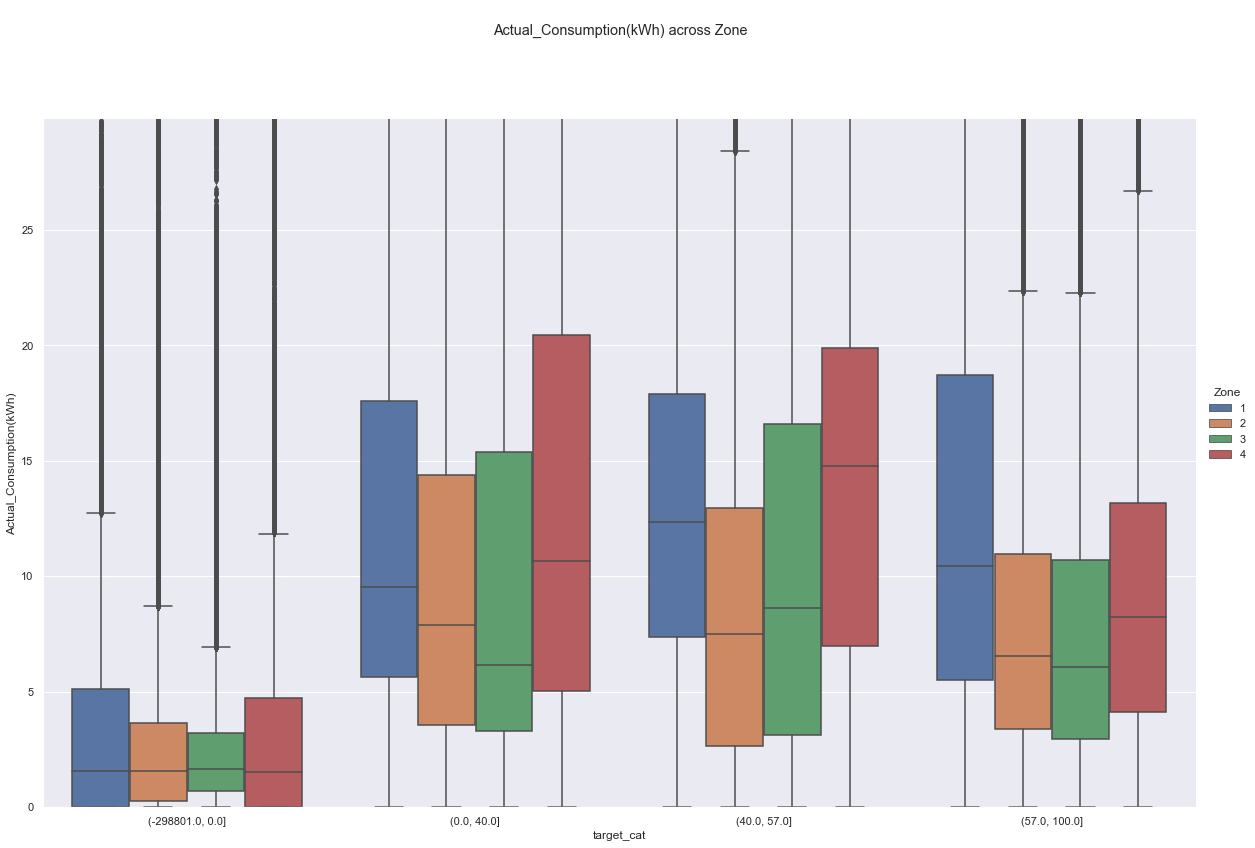

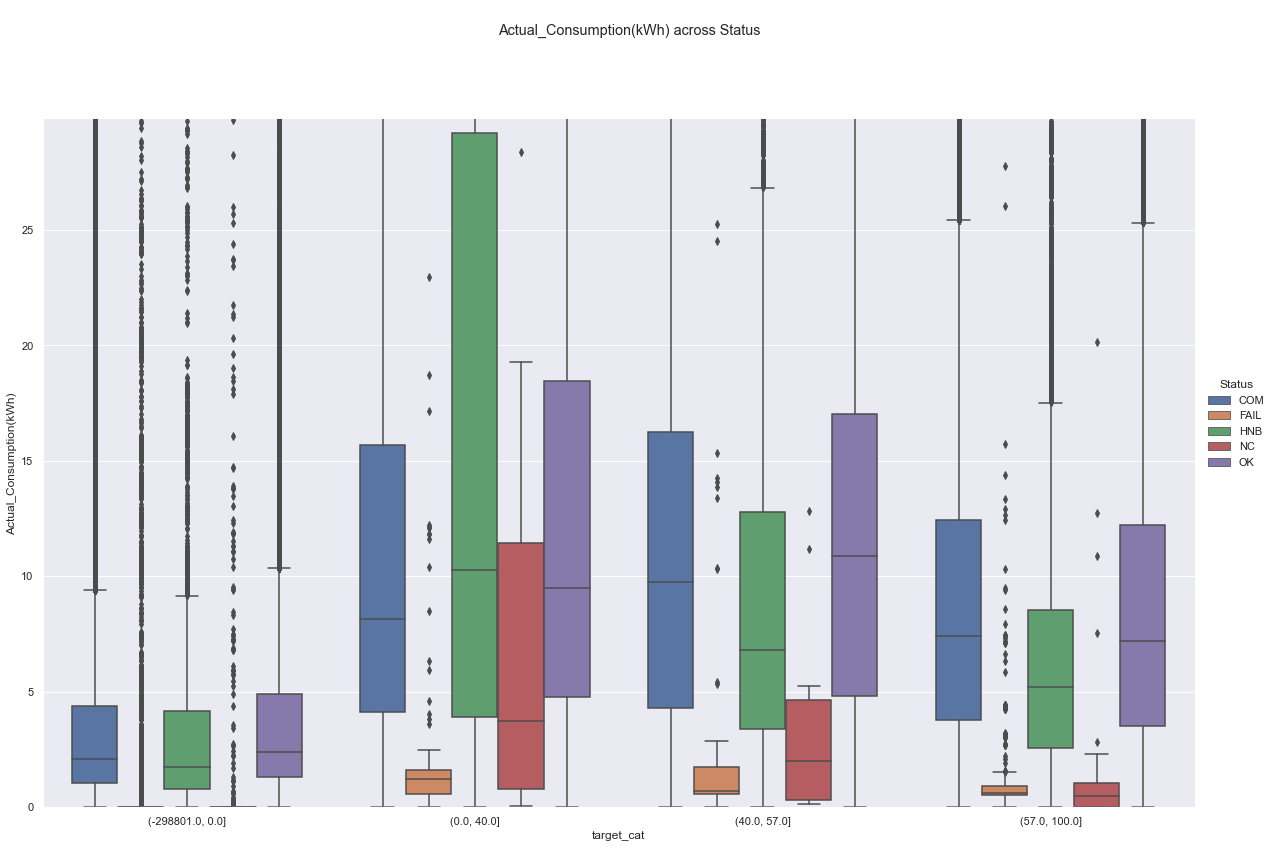

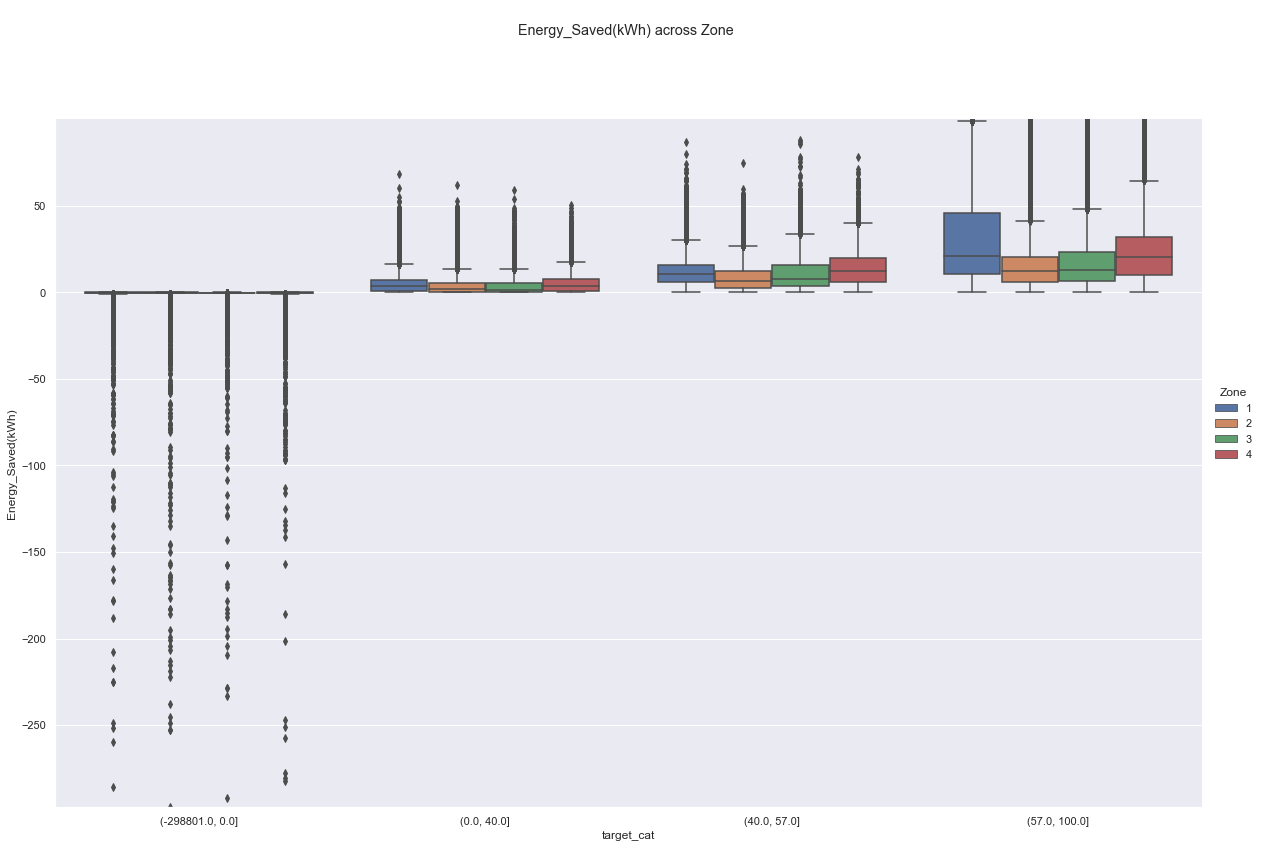

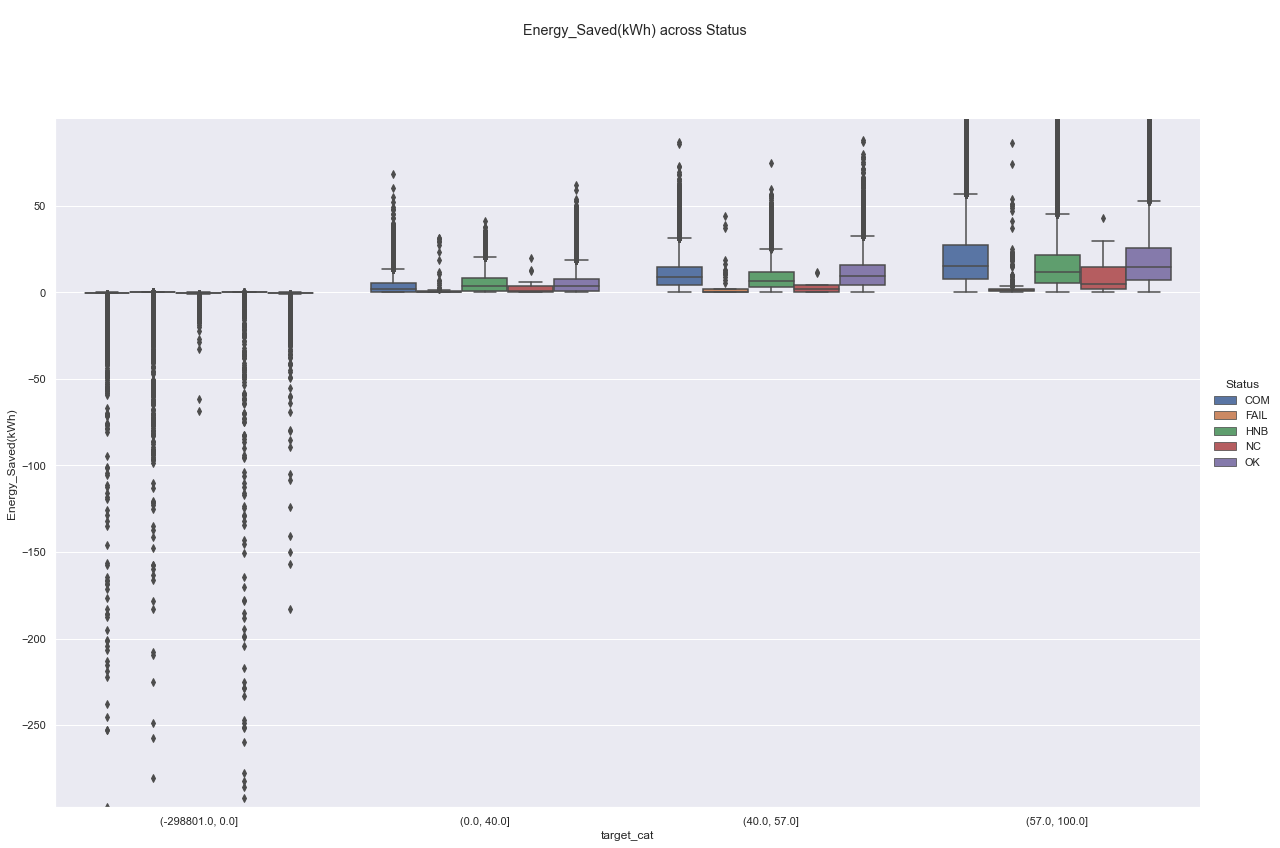

In [48]:
for i  in range(len(num_var)):
    var    =  num_var[i]
    for j in range(len(cat_var)):
        hue_v  =  cat_var[j]
        ax     =  sns.catplot(x = "target_cat", y = var, hue = hue_v, kind = "box", height = 12, aspect = 11.7/8.27, data = df)
        ul     =  np.max(df[var])/ 10
        ll     =  np.min(df[var])
        ax.set(ylim = (ll, ul)) 
        ax.fig.suptitle('\n'+ var + ' across ' + hue_v + '\n\n')
        ax.fig.subplots_adjust( top = 0.85 )
        plt.show()

### END of EDA